# Location or Size: What Influences House Prices in Mexico?

In [1]:

import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
# Import "data/mexico-real-estate-clean.csv"
df = pd.read_csv("../data/mexico-real-estate-clean.csv")
# Print object type, shape, and head
print("df type:", type(df))
print("df shape:", df.shape)
df.head()

df type: <class 'pandas.core.frame.DataFrame'>
df shape: (1736, 6)


,property_type,state,lat,lon,area_m2,price_usd
0,house,Estado de M�xico,19.560181,-99.233528,150,67965.56
1,house,Nuevo Le�n,25.688436,-100.198807,186,63223.78
2,apartment,Guerrero,16.767704,-99.764383,82,84298.37
3,apartment,Guerrero,16.829782,-99.911012,150,94308.80
4,house,Yucat�n,21.052583,-89.538639,205,105191.37


# Research Question 1
Which state has the most expensive real estate market?

Do housing prices vary by state? If so, which are the most expensive states for purchasing a home? During our exploratory data analysis, we used descriptive statistics like mean and median to get an idea of the "typical" house price in Mexico. Now, we need to break that calculation down by state and visualize the results.

We know in which state each house is located thanks to the "state" column. The next step is to divide our dataset into groups (one per state) and calculate the mean house price for each group.



# Use the groupby method to create a Series named mean_price_by_state, where the index contains each state in the dataset and the values correspond to the mean house price for that state. Make sure your Series is sorted from highest to lowest mean price.

In [3]:
# Declare variable `mean_price_by_state`
mean_price_by_state = df.groupby("state")["price_usd"].mean().sort_values(ascending=False)
# Print object type, shape, and head
print("mean_price_by_state type:", type(mean_price_by_state))
print("mean_price_by_state shape:", mean_price_by_state.shape)
mean_price_by_state.head()

mean_price_by_state type: <class 'pandas.core.series.Series'>
mean_price_by_state shape: (30,)


state
Quer�taro           133955.913281
Guanajuato          133277.965833
Nuevo Le�n          129221.985663
Distrito Federal    128347.267426
Quintana Roo        128065.416053
Name: price_usd, dtype: float64

# Use mean_price_by_state to create a bar chart of your results. Make sure the states are sorted from the highest to lowest mean, that you label the x-axis as "State" and the y-axis as "Mean Price [USD]", and give the chart the title "Mean House Price by State"

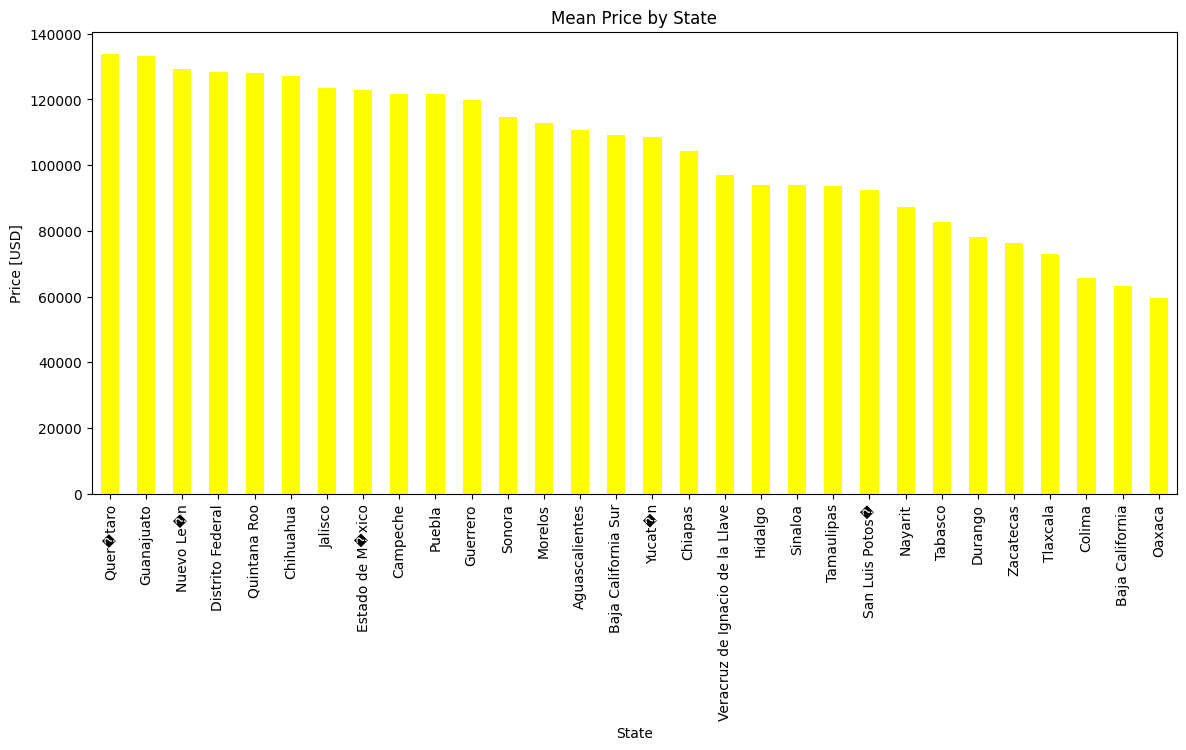

In [44]:
mean_price_by_state.plot(
    kind='bar',
    rot= 90,
    xlabel='State',
    color='#FFFF00',
    ylabel='Price [USD]',
    title='Mean Price by State',
    figsize=(14, 6)
);

# Combined bar and line chart, add a line

AttributeError: 'Axes' object has no attribute 'xticks'

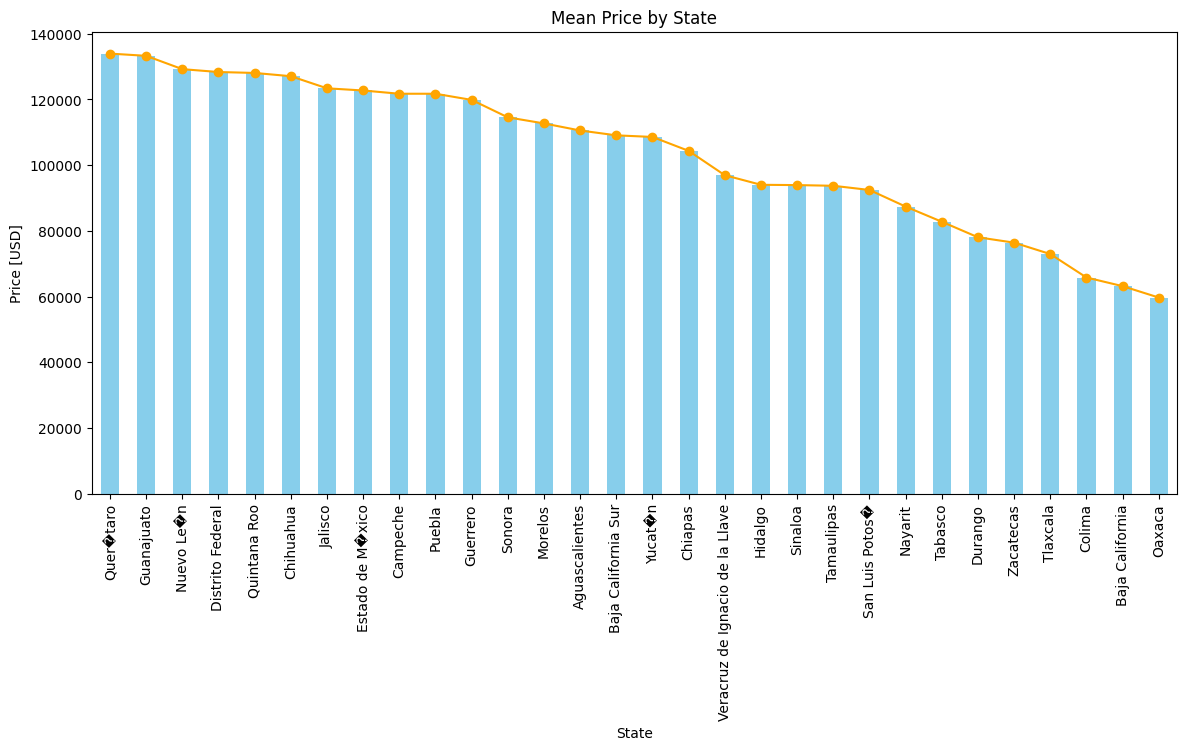

In [48]:
# Create the bar plot
ax = mean_price_by_state.plot(
    kind='bar', 
    color='#87CEEB', 
    legend=False,
    figsize=(14, 6)
)
# Add a line plot over the bar plot
ax.plot(
    mean_price_by_state.index, 
    mean_price_by_state.values, 
    marker='o', 
    linestyle='-', 
    color='#FFA500', 
    label='Trend Line'
)

# Customize labels and title
ax.set_xlabel('State')
ax.set_ylabel('Price [USD]')
ax.set_title('Mean Price by State')

# Rotate x-axis labels for better readability
ax.xticks(rotation=90)

# Show legend
ax.legend()
# Show plot
plt.show()

# Make Trend line using numpy

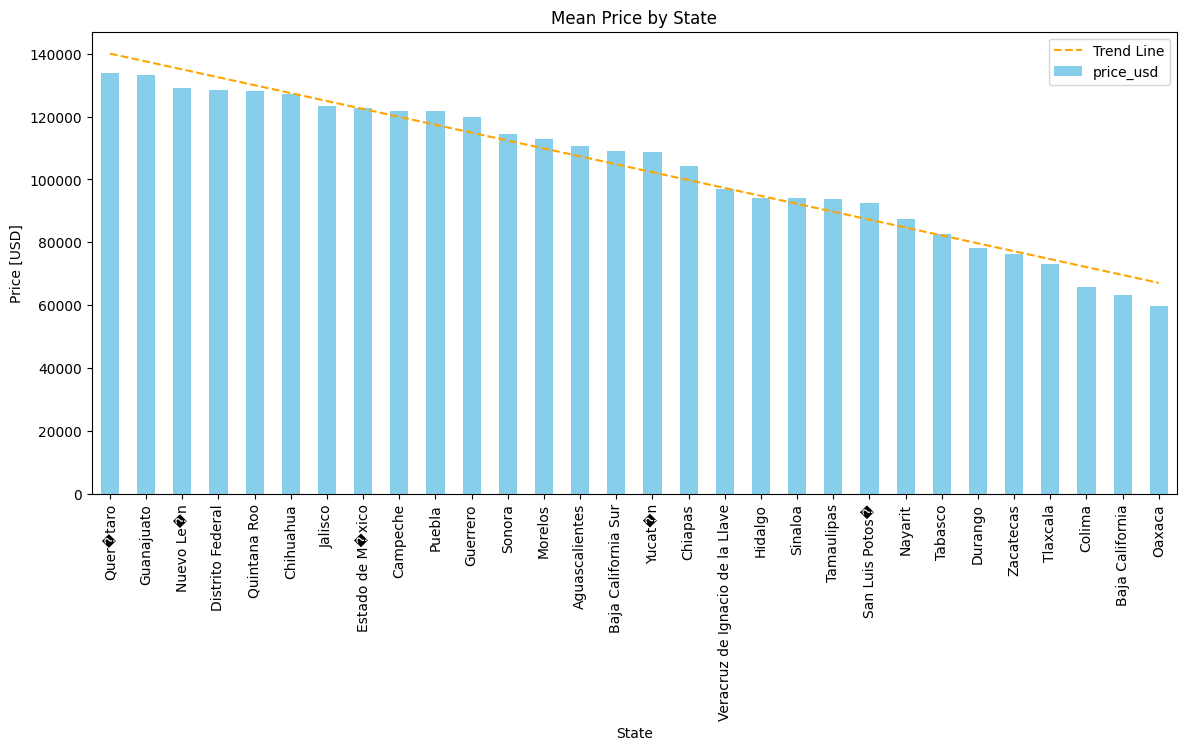

In [51]:
import numpy as np

# Create the bar plot
ax = mean_price_by_state.plot(
    kind='bar', 
    color='#87CEEB',
    figsize=(14, 6),
    legend=False
)

# Create a trendline using numpy's `polyfit`
x = np.arange(len(mean_price_by_state.index))
y = mean_price_by_state.values
z = np.polyfit(x, y, 1)  # Degree = 1 for a linear trendline
p = np.poly1d(z)

# Plot the trendline over the bar plot
ax.plot(mean_price_by_state.index, p(x), color='#FFA500', linestyle='--', label='Trend Line')

# Customize labels and title
ax.set_xlabel('State')
ax.set_ylabel('Price [USD]')
ax.set_title('Mean Price by State')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show legend
ax.legend()

# Show plot
plt.show()


# Create a new column in df called "price_per_m2". This should be the price for each house divided by it's size.

In [56]:
df["price_per_m2"] = (df["price_usd"] / df["area_m2"]).round(2)
df.head()

,property_type,state,lat,lon,area_m2,price_usd,price_per_m2
0,house,Estado de M�xico,19.560181,-99.233528,150,67965.56,453.10
1,house,Nuevo Le�n,25.688436,-100.198807,186,63223.78,339.91
2,apartment,Guerrero,16.767704,-99.764383,82,84298.37,1028.03
3,apartment,Guerrero,16.829782,-99.911012,150,94308.80,628.73
4,house,Yucat�n,21.052583,-89.538639,205,105191.37,513.13


# First, use the groupby method to create a Series where the index contains each state in the dataset and the values correspond to the mean house price per m2 for that state. Then use the Series to create a bar chart of your results. Make sure the states are sorted from the highest to lowest mean, that you label the x-axis as "State" and the y-axis as "Mean Price per M^2[USD]", and give the chart the title "Mean House Price per M^2 by State".

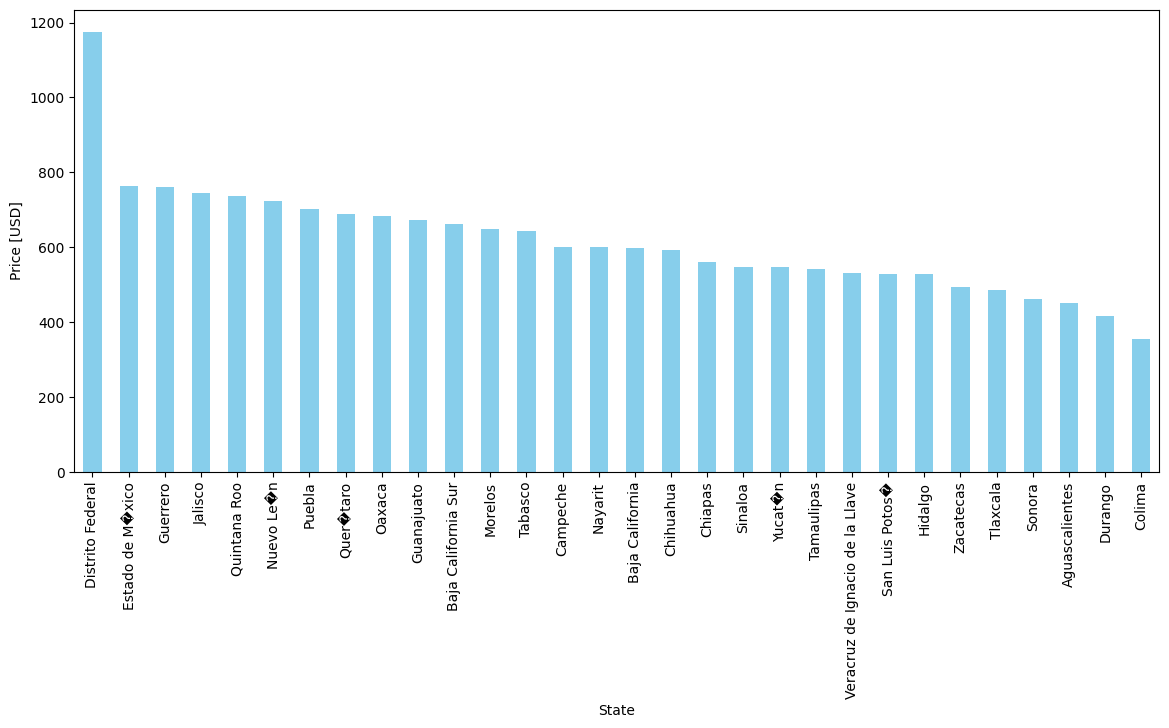

In [59]:
(
    df.
    groupby("state")
    ["price_per_m2"].mean()
    .sort_values(ascending=False)
    .plot(
        kind='bar', 
        color='#87CEEB', 
        legend=False,
        figsize=(14, 6),
        xlabel='State',
        ylabel='Price [USD]',
        rot = 90
    )
);

# Research Question 2
Is there a relationship between home size and price?

From our previous question, we know that the location of a home affects its price (especially if it's in Mexico City), but
what about home size? Does the size of a house influence price?

A scatter plot can be helpful when evaluating the relationship between two columns because it lets you see if two variables
are correlated — in this case, if an increase in home size is associated with an increase in price.

#### A scatter plot is a graph that uses dots to represent values for two different numeric variables. The position of each dot on the horizontal and vertical axis indicates values for an individual data point. Scatter plots are used to observe relationships between variables, and are especially useful if you're looking for correlations.

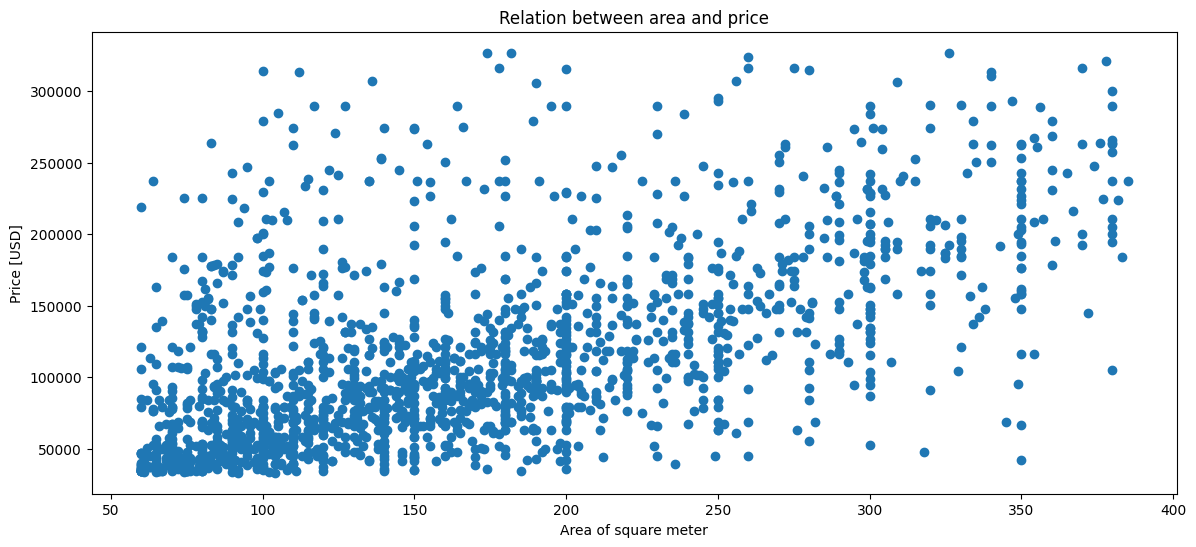

In [60]:
plt.figure(figsize=(14, 6));
plt.scatter(df["area_m2"], df["price_usd"])
plt.xlabel("Area of square meter")
plt.ylabel("Price [USD]")
plt.title("Relation between area and price")
plt.show()

# Using the corr method, calculate the Pearson correlation coefficient for "area_m2" and "price_usd"

In [63]:
# Calculate correlation of "price_usd" and "area_m2"
p_correlation = (df["area_m2"].corr(df["price_usd"])).round(2)
# Print correlation coefficient
print("Correlation of 'area_m2' and 'price_usd' (all Mexico):", p_correlation)

Correlation of 'area_m2' and 'price_usd' (all Mexico): 0.59


# Result:-  The correlation coefficient is over 0.5, so there's a moderate relationship house size and price in Mexico. But does this relationship hold true in every state? Let's look at a couple of states, starting with Morelos.

In [67]:
df_morelos = df[df["state"] == "Morelos"]
df_morelos.head()

,property_type,state,lat,lon,area_m2,price_usd,price_per_m2
6,house,Morelos,18.812605,-98.954826,281,151509.56,539.18
9,house,Morelos,18.804197,-98.932816,117,63223.78,540.37
18,house,Morelos,18.855343,-99.241142,73,36775.16,503.77
49,house,Morelos,18.804197,-98.932816,130,65858.10,506.60
55,house,Morelos,18.960244,-99.212962,305,227351.46,745.41


# Using df_morelos, create a scatter plot that shows price vs area. Make sure to use the same axis labels as your last scatter plot. The title should be "Morelos: Price vs. Area".

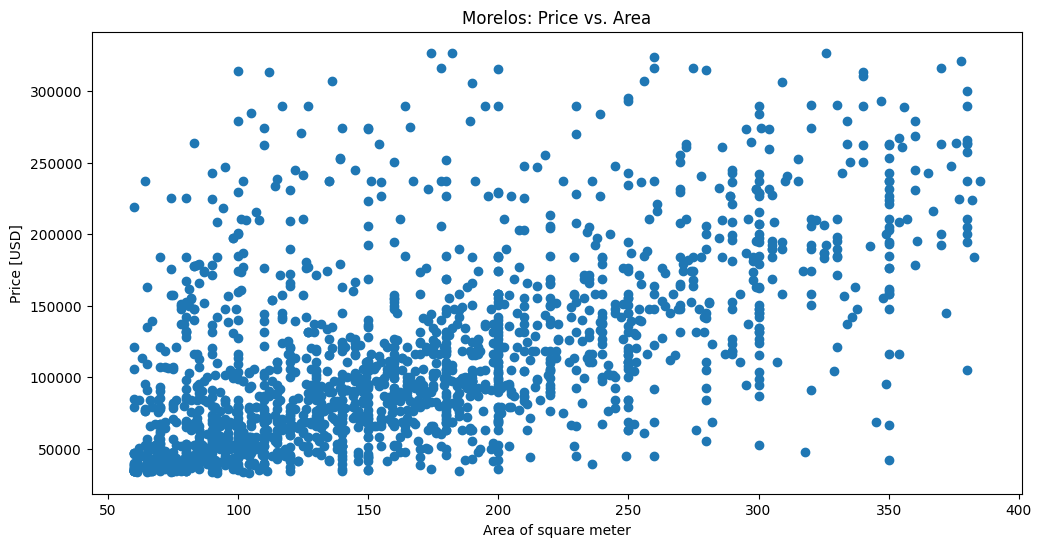

In [72]:
plt.figure(figsize=(12, 6));
# Create scatter plot of "price_usd" vs "area_m2" in Morelos
plt.scatter(df["area_m2"], df["price_usd"])

# Add x-axis label
plt.xlabel("Area of square meter")

# Add y-axis label
plt.ylabel("Price [USD]")

# Add title
plt.title("Morelos: Price vs. Area")
# Show plot
plt.show()

# Using the corr method, calculate the Pearson correlation coefficient for "area_m2" and "price_usd" in df_morelos

In [87]:
df_morelos_corr = df_morelos["area_m2"].corr(df_morelos["price_usd"]).round(2)
print(df_morelos_corr)

0.85


#### With a correlation coefficient that high, we can say that there's a strong relationship between house size and price in Morelos.

# First, create a new DataFrame called df_mexico_city that includes all the observations from df that are part of the Distrito Federal. Next, create a scatter plot that shows price vs area. Don't forget to label the x- and y-axis and use the title "Mexico City: Price vs. Area". Finally, calculate the correlation coefficient for "area_m2" and "price_usd" in df_mexico_city.

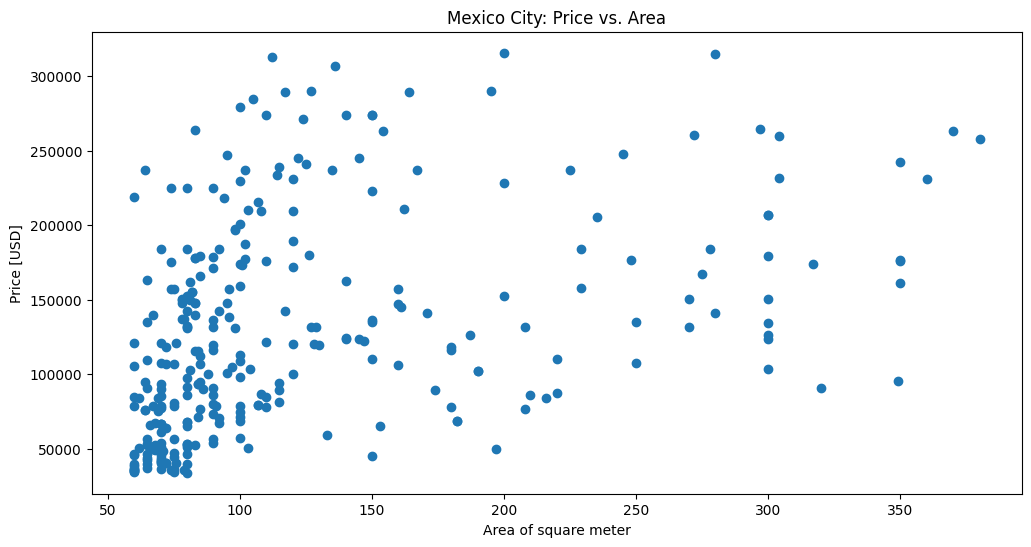

In [81]:
df_mexico_city = df[df["state"] == "Distrito Federal"]

plt.figure(figsize=(12, 6));
plt.scatter(df_mexico_city["area_m2"], df_mexico_city["price_usd"])
plt.xlabel("Area of square meter")
plt.ylabel("Price [USD]")
plt.title("Mexico City: Price vs. Area")
plt.show()

In [89]:
# Look at the correlation between area_m^2 and price usd for mexico city
mexico_city_corr = df_mexico_city["area_m2"].corr(df_mexico_city["price_usd"]).round(2)
print(mexico_city_corr)

0.41


# We can see in mexico city Very minimum correlation between this 2 variable    

# So Finally, Price is medium correlation between price and area all over the mexico city but some city high correlation and some city low correlation